# **Load the necessary Libraries**

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# **Read our Data**

In [2]:
train  = pd.read_csv('train_twitter.csv')
test = pd.read_csv('test_twitter.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# **Removing Twitter Handles (@user)**

In [ ]:
#Combine train and test set. This saves the trouble of performing the same steps twice on test and train.
combi = train.append(test, ignore_index=True)

<ipython-input-36-f394b20155d6>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


In [ ]:
#Function to remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [ ]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [ ]:
combi['tidy_tweet'].head()

0      when a father is dysfunctional and is so sel...
1      thanks for #lyft credit i can't use cause th...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tidy_tweet, dtype: object

# **Removing Punctuations, Numbers, and Special Characters**

In [ ]:
# we will replace everything except characters and hashtags with spaces
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-40-0cd3e4fc167b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


# **Removing Short Words**

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# **Tokenization**
*Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.*

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

# **Stemming**
*Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.*

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [ ]:
#stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# **Story Generation and Visualization from Tweets**
*A few probable questions are as follows:*

*   What are the most common words in the entire dataset?
*   What are the most common words in the dataset for negative and positive tweets, respectively?
*   How many hashtags are there in a tweet?
*   Which trends are associated with my dataset?
*   Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

# **Understanding the common words used in the tweets: WordCloud**
*A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.*

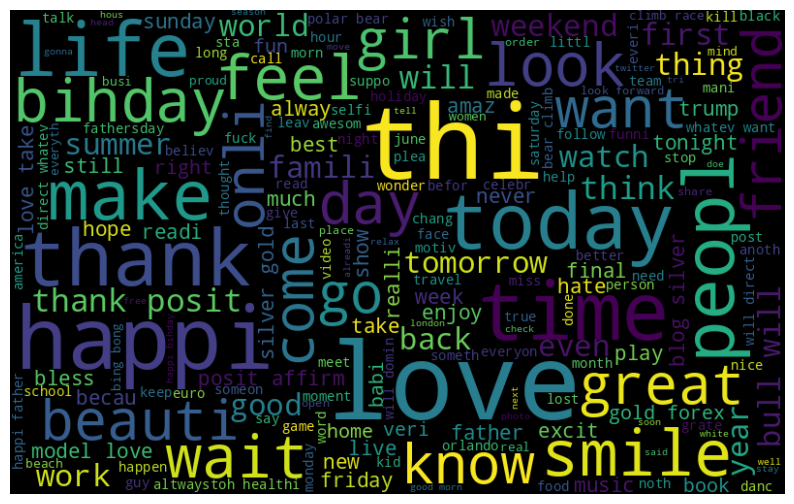

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Words in non racist/sexist tweets**

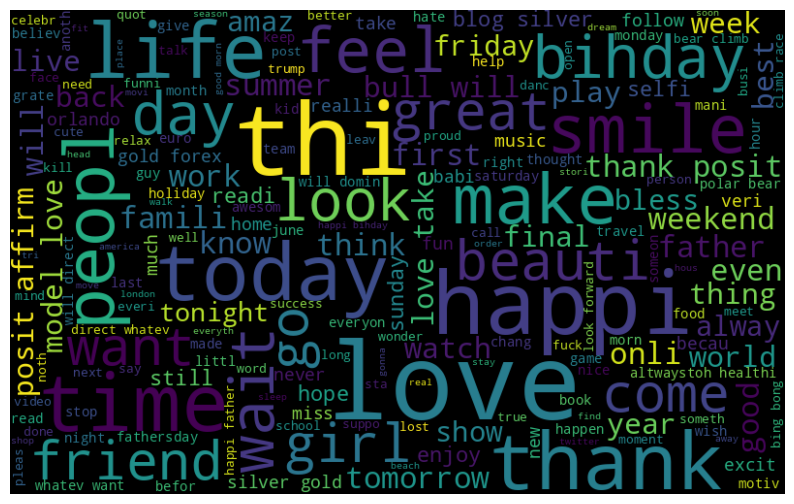

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Racist/Sexist Tweets**

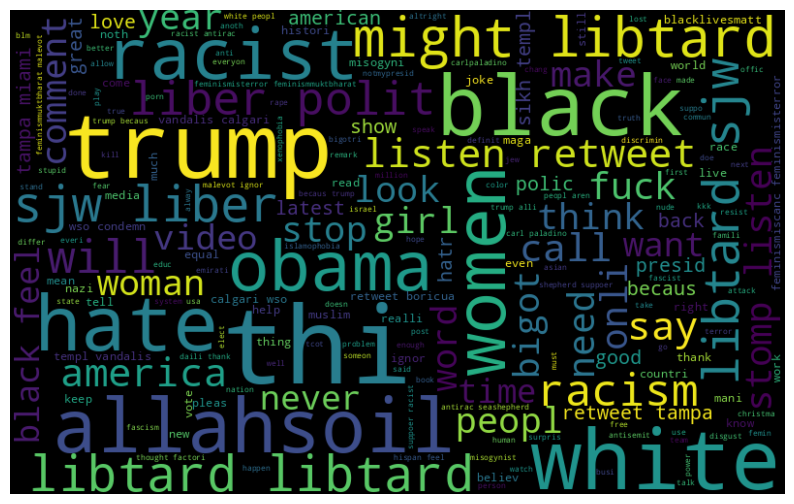

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Understanding the impact of Hashtags on tweets sentiment**
*We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.*

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# **Non-Racist/Sexist Tweets**

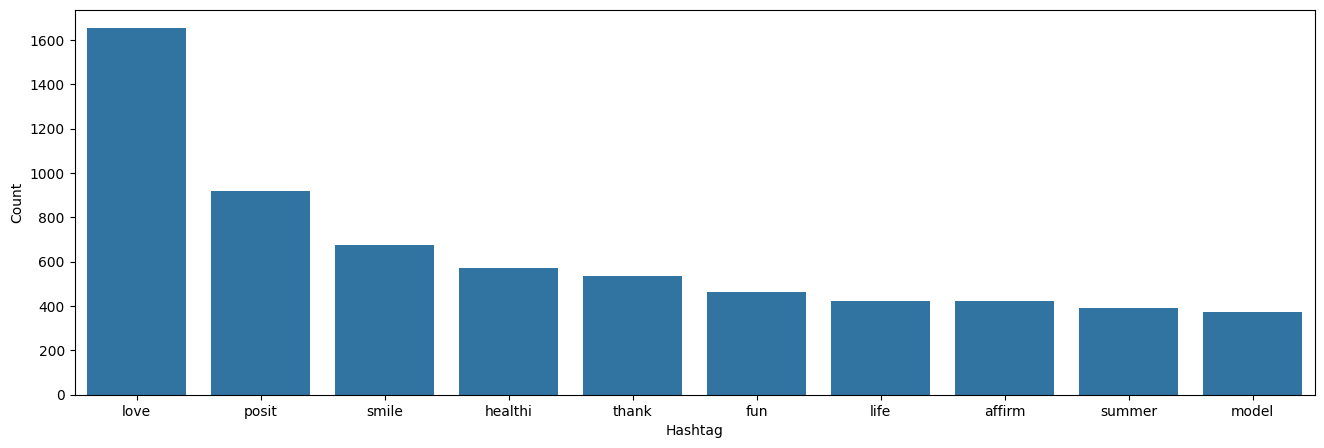

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Racist/Sexist Tweets**

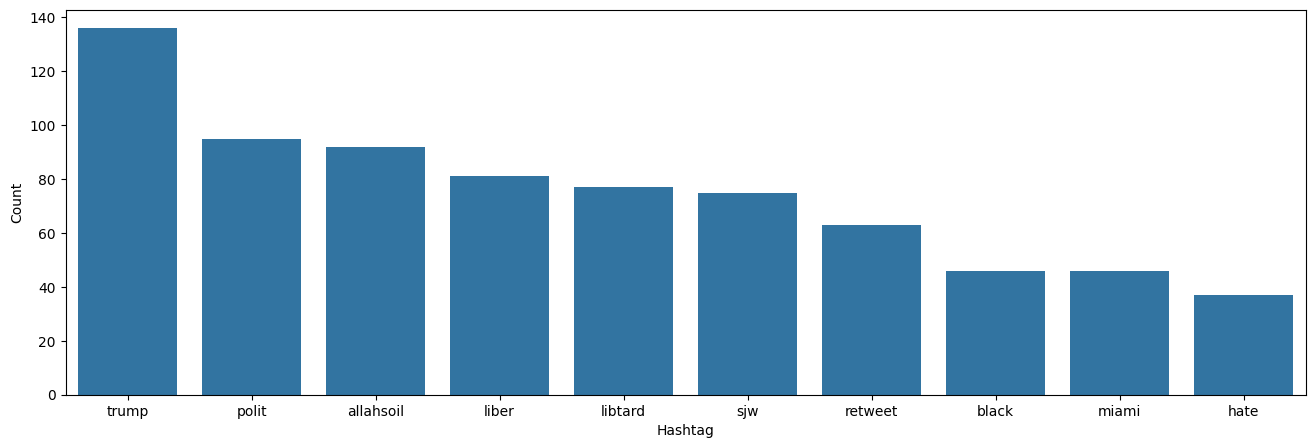

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Extracting Features from Cleaned Tweets**
*To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings.*

**Bag-of-Words Features**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

**TF-IDF Features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# **Model Building: Sentiment Analysis**
*We are now done with all the pre-modeling stages required to get the data in the proper form and shape. Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.*

**Building model using Bag-of-Words features**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

# lreg = LogisticRegression()
# lreg.fit(xtrain_bow, ytrain) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(int)

# f1_score(yvalid, prediction_int) # calculating f1 score

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

def train_evaluate_model(model, xtrain, ytrain, xvalid, yvalid):
    # Train the model
    model.fit(xtrain, ytrain)

    # Predict on the validation set
    prediction = model.predict(xvalid)

    # Calculate metrics
    f1 = f1_score(yvalid, prediction)
    accuracy = accuracy_score(yvalid, prediction)
    precision = precision_score(yvalid, prediction)
    recall = recall_score(yvalid, prediction)
    conf_matrix = confusion_matrix(yvalid, prediction)

    # Return the metrics
    return {
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

lreg = LogisticRegression()
metrics = train_evaluate_model(lreg, xtrain_bow, ytrain, xvalid_bow, yvalid)

print(f"LogisticRegression Metrics: {metrics}")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
metrics = train_evaluate_model(rf, xtrain_bow, ytrain, xvalid_bow, yvalid)

print(f"RandomForest Metrics: {metrics}")

svc = SVC(probability=True, random_state=42)
metrics = train_evaluate_model(svc, xtrain_bow, ytrain, xvalid_bow, yvalid)

print(f"SVC Metrics: {metrics}")

xgb = XGBClassifier(random_state=42)
metrics = train_evaluate_model(xgb, xtrain_bow, ytrain, xvalid_bow, yvalid)

print(f"XGBClassifier Metrics: {metrics}")

LogisticRegression Metrics: {'f1_score': 0.48262164846077454, 'accuracy': 0.9456669100010429, 'precision': 0.7523219814241486, 'recall': 0.35526315789473684, 'confusion_matrix': array([[8825,   80],
       [ 441,  243]])}
RandomForest Metrics: {'f1_score': 0.5547785547785548, 'accuracy': 0.9402440296172698, 'precision': 0.5920398009950248, 'recall': 0.5219298245614035, 'confusion_matrix': array([[8659,  246],
       [ 327,  357]])}
SVC Metrics: {'f1_score': 0.4681295715778474, 'accuracy': 0.9469183439357597, 'precision': 0.8205128205128205, 'recall': 0.32748538011695905, 'confusion_matrix': array([[8856,   49],
       [ 460,  224]])}
XGBClassifier Metrics: {'f1_score': 0.4838709677419355, 'accuracy': 0.9466054854520806, 'precision': 0.7792207792207793, 'recall': 0.3508771929824561, 'confusion_matrix': array([[8837,   68],
       [ 444,  240]])}


In [ ]:
test_pred = rf.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_twitter.csv', index=False) # writing data to a CSV file

**Building model using TF-IDF features**

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)

0.5451327433628319

# **Note**
**Bag-of-Words Features**

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example. Suppose we have only 2 document

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The list created would consist of all the unique tokens in the corpus C.

= [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
/content/Photo1.png

Now the columns in the above matrix can be used as features to build a classification model. Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus.

**TF-IDF Features**

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF